In [1]:
import pandas as pd
import numpy as np
import os

from pandas.api.types import CategoricalDtype 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
ICpath=r'C:\Users\joseh\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(ICpath,'02 Data','Prepared Data','ords_prods_cxs_profiles_segmentation.pkl'))

In [3]:
df

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_from_customer,product_id,add_to_cart_order,reordered,...,marital_status,income,birth_year,region,low_activity,top_dept,age,age_group,income_level,cx_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,1988,South,False,True,35,adult,low,young_parent
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,1988,South,False,True,35,adult,low,young_parent
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,1988,South,False,True,35,adult,low,young_parent
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,1988,South,False,True,35,adult,low,young_parent
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,1988,South,False,True,35,adult,low,young_parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,False,19675,1,1,...,single,53755,1992,West,False,True,31,young_adult,medium,young_single
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,...,married,46151,1995,South,True,True,28,young_adult,low,young_parent
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,...,married,46151,1995,South,True,True,28,young_adult,low,young_parent
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,...,married,46151,1995,South,True,True,28,young_adult,low,young_parent


In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'first_order_from_customer', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_label', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'gender', 'state', 'date_joined', 'dependants', 'marital_status',
       'income', 'birth_year', 'region', 'low_activity', 'top_dept', 'age',
       'age_group', 'income_level', 'cx_profile'],
      dtype='object')

In [5]:
df_ords_prior=pd.read_csv(os.path.join(ICpath,'02 Data','Original Data','order_products__prior.csv'))

In [6]:
df_ords_prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [7]:
df_ords_prior['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

In [8]:
df_ords_prior['add_to_cart_order'].describe()

count    3.243449e+07
mean     8.351076e+00
std      7.126671e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

In [9]:
df_ords_prior['order_id'].describe()

count    3.243449e+07
mean     1.710749e+06
std      9.873007e+05
min      2.000000e+00
25%      8.559430e+05
50%      1.711048e+06
75%      2.565514e+06
max      3.421083e+06
Name: order_id, dtype: float64

In [10]:
df['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [11]:
xtab_day_hr = pd.crosstab(df['order_day_of_week'],df['order_hour_of_day'])

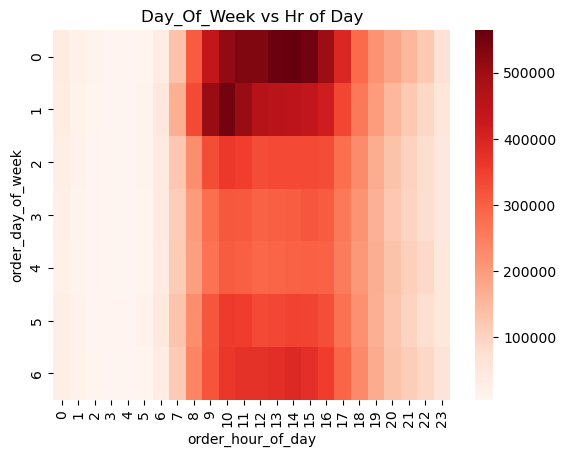

In [23]:
sns.heatmap(xtab_day_hr, cmap='Reds')
plt.title('Day_Of_Week vs Hr of Day')
plt.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','day_vs_hr_activity.jpg'),bbox_inches='tight')